<a href="https://colab.research.google.com/github/bryandaetz1/NLP_Review_Text/blob/master/Bryan_Daetz_nlp_classification_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
import nltk
import re 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [163]:
data = pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/Womens%20Clothing%20E-Commerce%20Reviews%20-%20Womens%20Clothing%20E-Commerce%20Reviews.csv')
data.head()

,Age,Title,Review Text,Recommended IND,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,1,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,1,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,1,General,Tops,Blouses


In [164]:
data.shape

(23486, 7)

In [165]:
data.dtypes

Age                 int64
Title              object
Review Text        object
Recommended IND     int64
Division Name      object
Department Name    object
Class Name         object
dtype: object

In [166]:
data.isna().sum()

Age                   0
Title              3810
Review Text         845
Recommended IND       0
Division Name        14
Department Name      14
Class Name           14
dtype: int64

In [167]:
#dropping null values of Review Text
data.drop(data.loc[data['Review Text'].isna()].index.tolist(), axis = 0, inplace = True)
data.shape

(22641, 7)

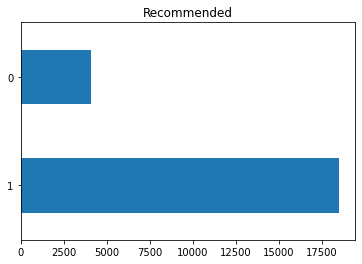

In [168]:
#getting value counts for target variable
data['Recommended IND'].value_counts().plot(kind = 'barh', title = 'Recommended')
plt.show()

# NLP Processing Review Text Feature


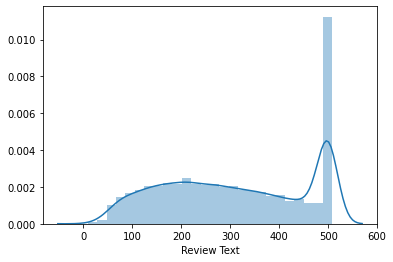

In [169]:
#plotting length of review text
length = data['Review Text'].str.len()
sns.distplot(length)
plt.show()

In [170]:
data['Review Text'].head(10)

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
5    I love tracy reese dresses, but this one is no...
6    I aded this in my basket at hte last mintue to...
7    I ordered this in carbon for store pick up, an...
8    I love this dress. i usually get an xs but it ...
9    I'm 5"5' and 125 lbs. i ordered the s petite t...
Name: Review Text, dtype: object

In [171]:
#getting set of English stopwords
from nltk.corpus import stopwords
stopword_set = set(stopwords.words('english'))

#NLP processing
lemma = WordNetLemmatizer()

In [172]:
#clean the text
text_reviews = list()
for review in data['Review Text']:
  text = re.sub('[^a-zA-z]'," ", str(review))
  text = text.lower()
  text = word_tokenize(text, language = 'english')
  text = [lemma.lemmatize(word) for word in text if(word) not in stopword_set]
  text = ' '.join(text)
  text_reviews.append(text)

text_reviews[:10]

['absolutely wonderful silky sexy comfortable',
 'love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
 'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
 'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment',
 'shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt',
 'love tracy reese dress one petite foot tall usually wear p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work return

In [173]:
#create the B.O.W (bag of words) model
cv = CountVectorizer(max_features = 1500)
reviews = cv.fit_transform(text_reviews).toarray()

In [174]:
#covert reviews to dataframe
reviews = pd.DataFrame(reviews, columns = cv.get_feature_names())
reviews.head()

,able,absolutely,accent,accentuates,accessory,accommodate,accurate,across,actual,actually,add,added,adding,addition,additional,adjust,adjustable,adorable,adore,advice,afraid,ag,age,ago,agree,ahead,air,airy,ala,allow,allows,almost,alone,along,already,also,alteration,altered,alternative,although,...,wonder,wonderful,wonderfully,wool,word,wore,work,worked,working,worn,worried,worry,worse,worth,would,woven,wow,wrap,wrinkle,wrinkled,wrist,write,wrong,xl,xsmall,xsp,xx,xxsp,yarn,year,yellow,yes,yesterday,yet,yoga,young,younger,zip,zipped,zipper
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Processing Other Features for Model

In [175]:
other_features = data.drop(['Review Text','Recommended IND'], axis = 1)
other_features.head()

,Age,Title,Division Name,Department Name,Class Name
0,33,NaN,Initmates,Intimate,Intimates
1,34,NaN,General,Dresses,Dresses
2,60,Some major design flaws,General,Dresses,Dresses
3,50,My favorite buy!,General Petite,Bottoms,Pants
4,47,Flattering shirt,General,Tops,Blouses


In [176]:
other_features.isna().sum()

Age                   0
Title              2966
Division Name        13
Department Name      13
Class Name           13
dtype: int64

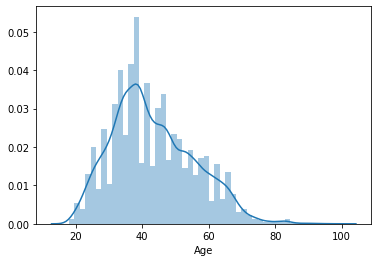

In [177]:
#distribution plot of Age column
sns.distplot(other_features.Age)
plt.show()

In [178]:
print('Minimum Age: ',other_features.Age.min())
print('Maximum Age: ',other_features.Age.max())

Minimum Age:  18
Maximum Age:  99


In [179]:
#creating bins for Ages 
bins = np.array([18, 30, 40, 50, 60, 99])
group_names = ['Age Under 30','Age 30-39','Age 40-49','Age 50-59','Age 60+']


other_features['Age Binned'] = pd.cut(other_features['Age'], bins, labels = group_names, include_lowest = True)
other_features['Age Binned'].head()

0    Age 30-39
1    Age 30-39
2    Age 50-59
3    Age 40-49
4    Age 40-49
Name: Age Binned, dtype: category
Categories (5, object): [Age Under 30 < Age 30-39 < Age 40-49 < Age 50-59 < Age 60+]

In [180]:
for column in other_features[['Division Name','Department Name','Class Name']]:
  print(column, '\n', other_features[column].value_counts(), '\n')

Division Name 
 General           13365
General Petite     7837
Initmates          1426
Name: Division Name, dtype: int64 

Department Name 
 Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64 

Class Name 
 Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Chemises             1
Casual bottoms       1
Name: Class Name, dtype: int64 



In [181]:
#getting Class Name values that appear over 200 times
top_classes = other_features['Class Name'].value_counts()
top_classes = top_classes[top_classes > 200].index.tolist()
top_classes

['Dresses',
 'Knits',
 'Blouses',
 'Sweaters',
 'Pants',
 'Jeans',
 'Fine gauge',
 'Skirts',
 'Jackets',
 'Lounge',
 'Swim',
 'Outerwear',
 'Shorts',
 'Sleep']

In [182]:
#creating dummy variables for multi-valued categorical features
dummies = pd.get_dummies(other_features, columns = ['Age Binned','Division Name','Department Name','Class Name'], drop_first = False)

#dropping features I won't be using in model
#may be worth also dropping Class_Dresses columns to reduce multicollinearity (it had the exact same values as Department Name_Dresses)
dummies.drop(['Age','Title'], axis = 1, inplace = True)
dummies.head()

,Age Binned_Age Under 30,Age Binned_Age 30-39,Age Binned_Age 40-49,Age Binned_Age 50-59,Age Binned_Age 60+,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,Class Name_Blouses,Class Name_Casual bottoms,Class Name_Chemises,Class Name_Dresses,Class Name_Fine gauge,Class Name_Intimates,Class Name_Jackets,Class Name_Jeans,Class Name_Knits,Class Name_Layering,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Splitting Data into Training, Validation, and Test Sets



In [183]:
#pd.concat was originally adding rows so I had to use reset_index
X = pd.concat([dummies.reset_index(drop = True),reviews.reset_index(drop = True)], axis = 1, sort = False)
X.shape

(22641, 1534)

In [184]:
X.head()

,Age Binned_Age Under 30,Age Binned_Age 30-39,Age Binned_Age 40-49,Age Binned_Age 50-59,Age Binned_Age 60+,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,Class Name_Blouses,Class Name_Casual bottoms,Class Name_Chemises,Class Name_Dresses,Class Name_Fine gauge,Class Name_Intimates,Class Name_Jackets,Class Name_Jeans,Class Name_Knits,Class Name_Layering,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend,able,absolutely,accent,accentuates,accessory,accommodate,...,wonder,wonderful,wonderfully,wool,word,wore,work,worked,working,worn,worried,worry,worse,worth,would,woven,wow,wrap,wrinkle,wrinkled,wrist,write,wrong,xl,xsmall,xsp,xx,xxsp,yarn,year,yellow,yes,yesterday,yet,yoga,young,younger,zip,zipped,zipper
0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [185]:
#checking for null values
null = X.isna().sum()
null[null > 0]

Series([], dtype: int64)

In [186]:
y = data['Recommended IND']
y.shape

(22641,)

In [187]:
#splitting into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [188]:
print(X_train.shape)
print(len(y_train))

(14489, 1534)
14489


#Resampling Data to Address Imbalances

In [189]:
from sklearn.utils import resample

#concatenating X_train and y_train back together
train = pd.concat([X_train.reset_index(drop = True), y_train.reset_index(drop = True)], axis =1)    #this is creating null values for some reason - fixed by resetting index
#separate minority and majority classes
not_recommended = train[train['Recommended IND'] == 0]
recommended = train[train['Recommended IND'] == 1]

#upsampling minority class
not_recommended_upsampled = resample(not_recommended,
                                     replace = True, #sample with replacement
                                     n_samples = len(recommended), #match sample size in majority class
                                     random_state = 0)

#concatenating majority class and upsampled minority class
train_upsampled = pd.concat([recommended, not_recommended_upsampled], axis = 0)

train_upsampled['Recommended IND'].value_counts()

1    11880
0    11880
Name: Recommended IND, dtype: int64

In [190]:
train_upsampled.isna().sum().sort_values(ascending = False)

Recommended IND            0
flip                       0
flannel                    0
flare                      0
flared                     0
                          ..
rack                       0
ran                        0
range                      0
rare                       0
Age Binned_Age Under 30    0
Length: 1535, dtype: int64

In [191]:
#splitting training set back into X and y to train model
y_train = train_upsampled['Recommended IND']
X_train = train_upsampled.drop('Recommended IND', axis = 1)

## Random Forest

In [192]:
#Random forest model
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_valid)

In [193]:
#evaluating model
fpr, tpr, thresholds = metrics.roc_curve(y_valid, rf_pred)
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, rf_pred))
print(confusion_matrix(y_valid, rf_pred))

AUC:  0.7296285785331257
              precision    recall  f1-score   support

           0       0.71      0.50      0.59       615
           1       0.90      0.96      0.93      3008

    accuracy                           0.88      3623
   macro avg       0.81      0.73      0.76      3623
weighted avg       0.87      0.88      0.87      3623

[[ 308  307]
 [ 125 2883]]


In [194]:
# getting feature importances for random forest model
name_list = list()
score_list = list()

for name, score in zip(X.columns, rf.feature_importances_):
  a = name
  b = score
  name_list.append(a)
  score_list.append(b)

print('Name: \n', name_list[:10], '\n')
print('Score: \n', score_list[:10])

Name: 
 ['Age Binned_Age Under 30', 'Age Binned_Age 30-39', 'Age Binned_Age 40-49', 'Age Binned_Age 50-59', 'Age Binned_Age 60+', 'Division Name_General', 'Division Name_General Petite', 'Division Name_Initmates', 'Department Name_Bottoms', 'Department Name_Dresses'] 

Score: 
 [0.0021581598462194766, 0.002784668359901204, 0.002877694901405333, 0.002183498650968437, 0.001845237933097168, 0.0029775274060157893, 0.0029088730338663036, 0.001058400617638632, 0.0020144846713777745, 0.0022687701206479285]


In [195]:
#creating dataframe of random forest feature importances
rf_feature_dict = {'Name': name_list, 'Score': score_list}
rf_features = pd.DataFrame(rf_feature_dict)

rf_features.sort_values(by = 'Score', ascending = False, inplace = True)

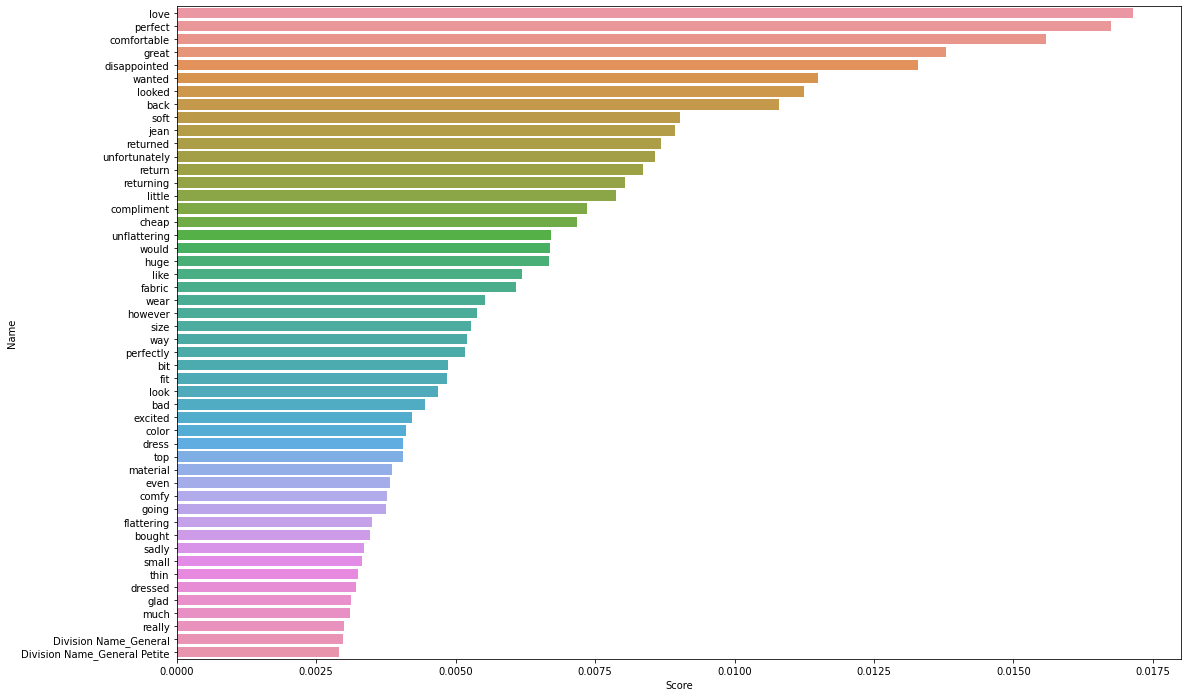

In [196]:
#plotting feature importances
f, ax = plt.subplots(figsize = (18,12))
sns.barplot(x = 'Score', y = 'Name', data = rf_features.head(50), orient = "h")
plt.show()

#Random Forest Model Using 500 Best Predictors

In [197]:
# using only 500 best predictors from original RF model
best_predictors = rf_features.Name[:500]
X_train2 = X_train[best_predictors]
X_valid2 = X_valid[best_predictors]
X_test2 = X_test[best_predictors]

In [198]:
#RF model
rf_best = RandomForestClassifier(n_estimators = 100)
rf_best.fit(X_train2, y_train)
rf_best_pred = rf_best.predict(X_valid2)

In [199]:
#evaluating model
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_valid, rf_best_pred)
print('AUC: ', metrics.auc(fpr2, tpr2))
print(classification_report(y_valid, rf_best_pred))
print(confusion_matrix(y_valid, rf_best_pred))

AUC:  0.7233845247362047
              precision    recall  f1-score   support

           0       0.68      0.49      0.57       615
           1       0.90      0.95      0.93      3008

    accuracy                           0.87      3623
   macro avg       0.79      0.72      0.75      3623
weighted avg       0.86      0.87      0.87      3623

[[ 304  311]
 [ 143 2865]]


# XG Boost Model Using All Predictors

In [200]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_valid)

In [201]:
#evaluating model
fpr_xgb, tpr_xgb, thresholds_xgb = metrics.roc_curve(y_valid, xgb_pred)
print('AUC: ', metrics.auc(fpr_xgb, tpr_xgb))
print(classification_report(y_valid, xgb_pred))
print(confusion_matrix(y_valid, xgb_pred))

AUC:  0.806473793461339
              precision    recall  f1-score   support

           0       0.46      0.81      0.58       615
           1       0.95      0.80      0.87      3008

    accuracy                           0.80      3623
   macro avg       0.71      0.81      0.73      3623
weighted avg       0.87      0.80      0.82      3623

[[ 498  117]
 [ 592 2416]]


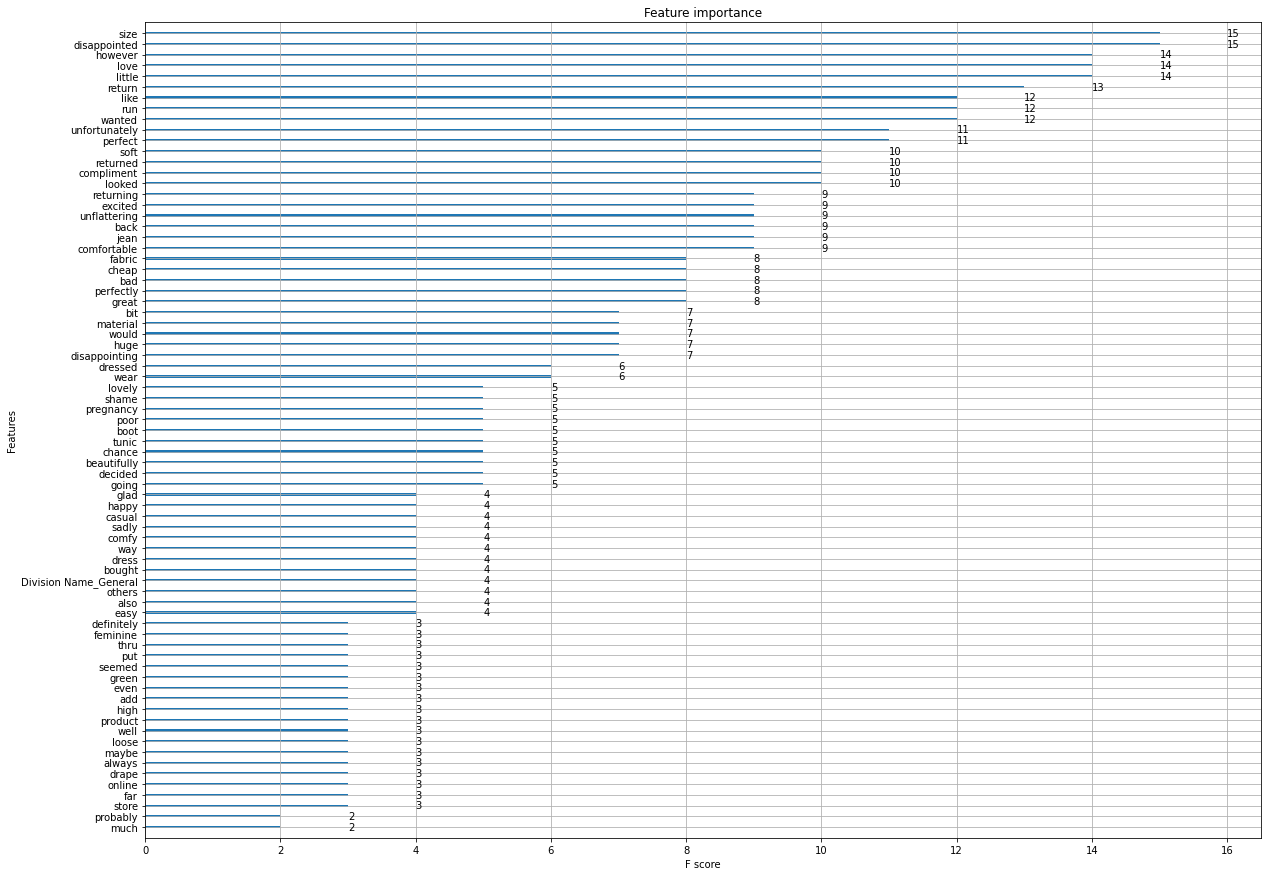

In [211]:
#plotting feature importances
import xgboost
f, ax = plt.subplots(figsize = (20,15))
xgboost.plot_importance(xgb, max_num_features = 75, ax = ax)

#XG Boost Model Using 500 Best Predictors

In [203]:
# getting feature importances for xgboost model
name_list_xgb = list()
score_list_xgb = list()

for name, score in zip(X.columns, xgb.feature_importances_):
  a = name
  b = score
  name_list_xgb.append(a)
  score_list_xgb.append(b)

print('Name: \n', name_list_xgb[:10], '\n')
print('Score: \n', score_list_xgb[:10])

Name: 
 ['Age Binned_Age Under 30', 'Age Binned_Age 30-39', 'Age Binned_Age 40-49', 'Age Binned_Age 50-59', 'Age Binned_Age 60+', 'Division Name_General', 'Division Name_General Petite', 'Division Name_Initmates', 'Department Name_Bottoms', 'Department Name_Dresses'] 

Score: 
 [0.0, 0.00066061225, 0.0011170398, 0.00070922176, 0.0009815766, 0.00017828417, 0.0, 0.0, 0.0023160512, 0.0]


In [204]:
#creating dataframe of xgboost feature importances
xgb_feature_dict = {'Name': name_list_xgb, 'Score': score_list_xgb}
xgb_features = pd.DataFrame(xgb_feature_dict)

xgb_features.sort_values(by = 'Score', ascending = False, inplace = True)

In [213]:
#using only 500 best predictors from original xgb model
best_predictors_xgb = xgb_features.Name[:500]

X_train_best = X_train[best_predictors_xgb]
X_valid_best = X_valid[best_predictors_xgb]
X_test_best = X_train[best_predictors_xgb]

In [214]:
bst = XGBClassifier()
bst.fit(X_train_best, y_train)
bst_pred = bst.predict(X_valid_best)

In [215]:
#evaluating model
fpr_bst, tpr_bst, thresholds_bst = metrics.roc_curve(y_valid, bst_pred)
print('AUC: ', metrics.auc(fpr_bst, tpr_bst))
print(classification_report(y_valid, bst_pred))
print(confusion_matrix(y_valid, bst_pred))

AUC:  0.8068062402698496
              precision    recall  f1-score   support

           0       0.46      0.81      0.58       615
           1       0.95      0.80      0.87      3008

    accuracy                           0.80      3623
   macro avg       0.71      0.81      0.73      3623
weighted avg       0.87      0.80      0.82      3623

[[ 498  117]
 [ 590 2418]]


# Naive Bayes

In [217]:
# Naive bayes multinomial
clf = MultinomialNB()
clf.fit(X_train, y_train)
nb_pred = clf.predict(X_valid)

In [218]:
# evaluating model
fpr_nb, tpr_nb, thresholds_nb = metrics.roc_curve(y_valid, nb_pred)
print('AUC: ', metrics.auc(fpr_nb, tpr_nb))
print(classification_report(y_valid, nb_pred))
print(confusion_matrix(y_valid, nb_pred))

AUC:  0.8519563008130081
              precision    recall  f1-score   support

           0       0.53      0.86      0.66       615
           1       0.97      0.84      0.90      3008

    accuracy                           0.85      3623
   macro avg       0.75      0.85      0.78      3623
weighted avg       0.89      0.85      0.86      3623

[[ 529   86]
 [ 470 2538]]
